In [39]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [40]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')
# setosa
# versicolor
# virginica

# sepal length (cm)
# sepal width (cm)
# petal length (cm)
# petal width (cm)

In [41]:
X_df = X.copy()
X_df['Actual'] = y

In [42]:
print("Dataset shape:", X.shape)

Dataset shape: (150, 4)


In [43]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
X_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Actual
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
print("Target classes:", iris.target_names)

Target classes: ['setosa' 'versicolor' 'virginica']


In [46]:
target_mapping = {i: str(name) for i, name in enumerate(iris.target_names)}
print(target_mapping)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


# Training

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

In [50]:
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [51]:
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Evaluation

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.975
Test Accuracy: 0.9333333333333333


# Finding Optimal Value of K

### Elbow method to choose k

In [54]:
import numpy as np

In [55]:
accuracy_test = []
error_rates = []
K_range = range(1, 21)
for k in K_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    error = np.mean(y_pred != y_test)
    accuracy_test.append(accuracy)
    error_rates.append(error)


In [56]:
import matplotlib.pyplot as plt

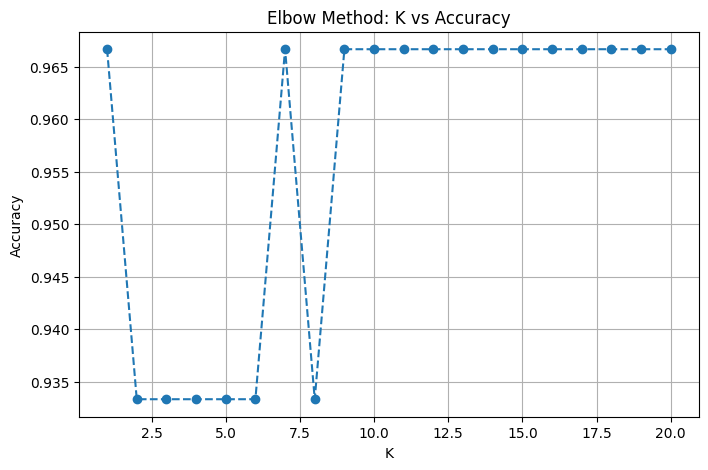

In [57]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, accuracy_test, marker='o', linestyle='--')
plt.title('Elbow Method: K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [58]:
# k = 13 looks like a good value of K

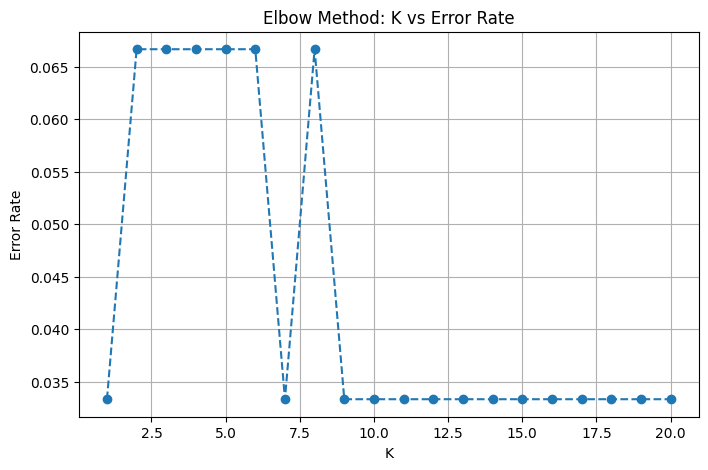

In [59]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, error_rates, marker='o', linestyle='--')
plt.title('Elbow Method: K vs Error Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

### Cross validation to find best value of K

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
cv_scores = []
K_range = range(1,21)
for k in K_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=10, scoring='accuracy')
    print(f"Nearest neighbours selected : {k}, Mean Scores : {scores.mean()}, Scores for each fold : {scores.tolist()}")
    cv_scores.append(scores.mean())


Nearest neighbours selected : 1, Mean Scores : 0.9533333333333334, Scores for each fold : [1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.8666666666666667, 1.0, 0.8, 1.0, 1.0, 1.0]
Nearest neighbours selected : 2, Mean Scores : 0.9533333333333334, Scores for each fold : [1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.8666666666666667, 1.0, 0.8, 1.0, 1.0, 1.0]
Nearest neighbours selected : 3, Mean Scores : 0.9533333333333334, Scores for each fold : [1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.8666666666666667, 1.0, 0.8, 1.0, 1.0, 1.0]
Nearest neighbours selected : 4, Mean Scores : 0.9466666666666667, Scores for each fold : [1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0, 0.8, 0.9333333333333333, 1.0, 0.9333333333333333]
Nearest neighbours selected : 5, Mean Scores : 0.9533333333333334, Scores for each fold : [1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.8666666666666667, 0.9333333333333333, 0.8666666666666667, 1.0, 1.0, 1.0]
Nearest ne

In [63]:
best_k = K_range[np.argmax(cv_scores)]
print(f"Best K using Cross Validation: {best_k}")
print(f"Cross-validation accuracy for K={best_k}: {max(cv_scores):.4f}")

Best K using Cross Validation: 8
Cross-validation accuracy for K=8: 0.9667


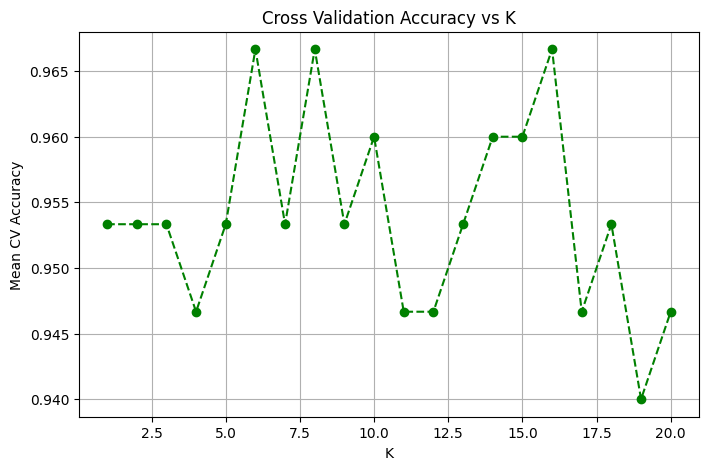

In [64]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, cv_scores, marker='o', linestyle='--', color='green')
plt.title('Cross Validation Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()

# Prediction Function

In [ ]:
k = 8
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [72]:
y_train_pred_knn = knn.predict(X_train_scaled)
y_test_pred_knn = knn.predict(X_test_scaled)

In [66]:
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    sample_df = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]], columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
    sample_scaled = scaler.transform(sample_df)
    prediction = knn.predict(sample_scaled)[0]
    predicted_species = iris.target_names[prediction]
    return predicted_species, prediction

In [67]:
example_pred, prediction = predict_iris(5.1, 3.5, 1.4, 0.2)
print("Example Prediction -> Species:", example_pred)

Example Prediction -> Species: setosa


In [68]:
predictions = []
predictions_index = []
for i in X.values :
    pred, prediction = predict_iris(i[0], i[1], i[2], i[3])
    predictions.append(pred)
    predictions_index.append(prediction)

In [69]:
X_df['predicted_species'] = predictions
X_df['predicted_species_idx'] = predictions_index

In [70]:
X_df.to_csv("predicted_answer.csv")

In [71]:
from sklearn.metrics import confusion_matrix

In [73]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_knn))

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


# SVM - Support Vector Machine

In [74]:
from sklearn.svm import SVC

In [75]:
# linear_svm = SVC(kernel="linear", C=1.0, random_state=20)

svm_models = {
    "Linear": SVC(kernel="linear", C=1.0, random_state=20),
    "Polynomial": SVC(kernel="poly", degree=3, C=1.0, random_state=20),
    "RBF": SVC(kernel="rbf", C=1.0, gamma="scale", random_state=20)
}

In [77]:
results = []

In [78]:
for name, model in svm_models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    results.append([name, train_acc, test_acc])
    print(f"{name} SVM:")
    print(f"  Train Accuracy: {train_acc:.4f}")
    print(f"  Test Accuracy:  {test_acc:.4f}")
    print("==="*10)

Linear SVM:
  Train Accuracy: 0.9750
  Test Accuracy:  1.0000
Polynomial SVM:
  Train Accuracy: 0.9333
  Test Accuracy:  0.9000
RBF SVM:
  Train Accuracy: 0.9750
  Test Accuracy:  0.9667


In [88]:
# Validation with CV across SVM kernels

kernels = ['linear', 'poly', 'rbf']
cv_results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=20)
    scores = cross_val_score(svm, X_scaled, y, cv=10, scoring='accuracy')
    cv_results[kernel] = scores.mean()
    print(f"{kernel.capitalize()} SVM: Mean CV Accuracy = {scores.mean()}")


Linear SVM: Mean CV Accuracy = 0.9666666666666668
Poly SVM: Mean CV Accuracy = 0.9400000000000001
Rbf SVM: Mean CV Accuracy = 0.9666666666666666


In [89]:
best_kernel = max(cv_results, key=cv_results.get)
print(f"Best Kernel by Cross-Validation: {best_kernel.upper()} ({cv_results[best_kernel]:.4f})")

Best Kernel by Cross-Validation: LINEAR (0.9667)


# Hyperparameter Tuning

In [90]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'C': [0.1, 0.5, 1, 2, 10, 20, 100],
    'gamma' : ['scale', 'auto'],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
}

# 0.1, scale, linear
# 0.1, scale, poly
# 0.1, scale, rbf
# 0.1, scale, sigmoid

# 0.1, auto, linear
# 0.1, auto, poly
# 0.1, auto, rbf
# 0.1, auto, sigmoid

In [ ]:
grid_search = GridSearchCV(SVC(random_state=20), param_grid, cv=10, scoring='accuracy', n_jobs=-1)

In [93]:
grid_search.fit(X_scaled, y)

,estimator,SVC(random_state=20)
,param_grid,"{'C': [0.1, 0.5, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'poly', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.5


In [94]:
grid_search.best_params_

{'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}

In [95]:
grid_search.best_score_

np.float64(0.9800000000000001)

In [96]:
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Best parameters found: {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.9800
